<a href="https://colab.research.google.com/github/LeonZou7/TF-Study-Log/blob/master/Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.1
0.1064
-----------------------------------
0.6
0.6421
-----------------------------------
0.69
0.7342
-----------------------------------
0.81
0.7877
-----------------------------------
0.86
0.8107
-----------------------------------
0.83
0.8211
-----------------------------------
0.86
0.8338
-----------------------------------
0.82
0.8469
-----------------------------------
0.82
0.848
-----------------------------------
0.85
0.8571
-----------------------------------
0.85
0.8583
-----------------------------------
0.86
0.8617
-----------------------------------
0.93
0.8663
-----------------------------------
0.88
0.8671
-----------------------------------
0.9
0.87
-----------------------------------
0.89
0.8716
-----------------------------------
0.92
0.874
---------------------------------

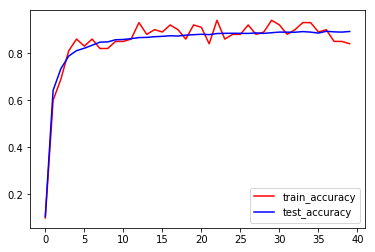

In [37]:
'''
Example 4 Classification
利用开源数据集MNIST，进行手写数字分类的练习
每个手写数字的输入形式是28x28的像素矩阵，输出形式为10x1的矩阵，置为1的行的数值即为输出
'''
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


def add_layer(inputs, in_size, out_size, activation_function=None):
  # 定义两个参数并初始化，Weights是随机矩阵
  Weights = tf.Variable(tf.random_normal([in_size, out_size]))
  # biaes设置为一个数列，并且初始化时不推荐为0
  biaes = tf.Variable(tf.zeros([1, out_size]) + 0.1)
  
  # 输出的预测值 = inputs * Weights + biaes
  Wx_plus_b = tf.matmul(inputs, Weights) + biaes
  
  # 使用激活函数
  if activation_function is None:
    outputs = Wx_plus_b
  else:
    outputs = activation_function(Wx_plus_b)
    
  return outputs


def compute_accuracy(v_xs, v_ys):
  global prediction
  y_pre = sess.run(prediction, feed_dict={xs:v_xs})
  correct_prediction = tf.equal(tf.argmax(y_pre, 1), tf.argmax(v_ys, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  result = sess.run(accuracy, feed_dict={xs:v_xs, ys:v_ys})
  return result


# 定义输入值，不规定数据量（None），但规定数据类型和形式（28 x 28 = 784）
xs = tf.placeholder(tf.float32, [None, 784])
# 定义输出值， 不规定数据量（None），但规定数据类型和形式
ys = tf.placeholder(tf.float32, [None, 10])
# softmax激活函数专门用来做classification
prediction = add_layer(xs, 784, 10, activation_function=tf.nn.softmax)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), 
                                              reduction_indices=[1])) # loss

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init)

train_acc = []
test_acc = []

x = range(0, 40)
y1 = train_acc
y2 = test_acc

for i in range(2000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={xs:batch_xs, ys:batch_ys})
  if i % 50 == 0:
    train_now = compute_accuracy(batch_xs, batch_ys);
    test_now = compute_accuracy(mnist.test.images, mnist.test.labels);
    train_acc.append(train_now);
    test_acc.append(test_now);
    print(train_now)
    print(test_now)
    print('-----------------------------------')
    
plt.plot(x, y1, color='red', label='train_accuracy')
plt.plot(x, y2, color='blue', label='test_accuracy')
plt.legend()
plt.show()